In [6]:
%pip install pandas 
%pip install numpy
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

#this mainly used to make plots have higher resolution
%config InlineBackend.figure_formats = ['retina']

## To Make my plot look better 

In [ ]:
plt.rcParams['figure.figsize' ] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

#### An Helper function to display cluter what it does 
* if num of cluster = 0 all First and second rows  of X should have  a scatter plot  of color[0] = blue , alpha and size = 0
* if  cluster is present get number of clusters 

In [19]:
def display_cluster(X, km = [], num_clusters =0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1] , alpha=alpha, s=s, c = color[0])
    else:
        for i in range(num_clusters):
             plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
             plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

It generates 20 evenly spaced points on a unit circle and displays them — a great setup for clustering experiments

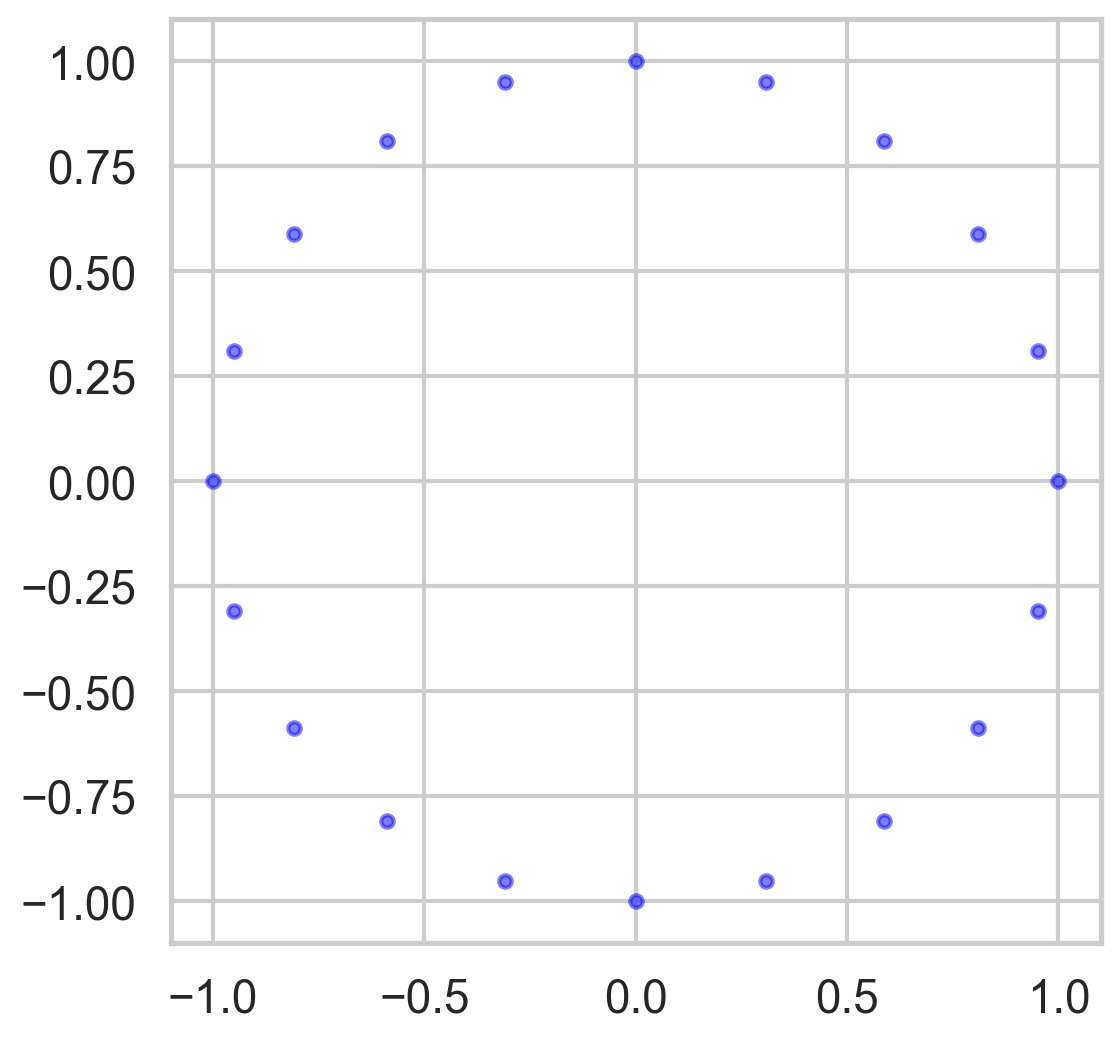

In [17]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

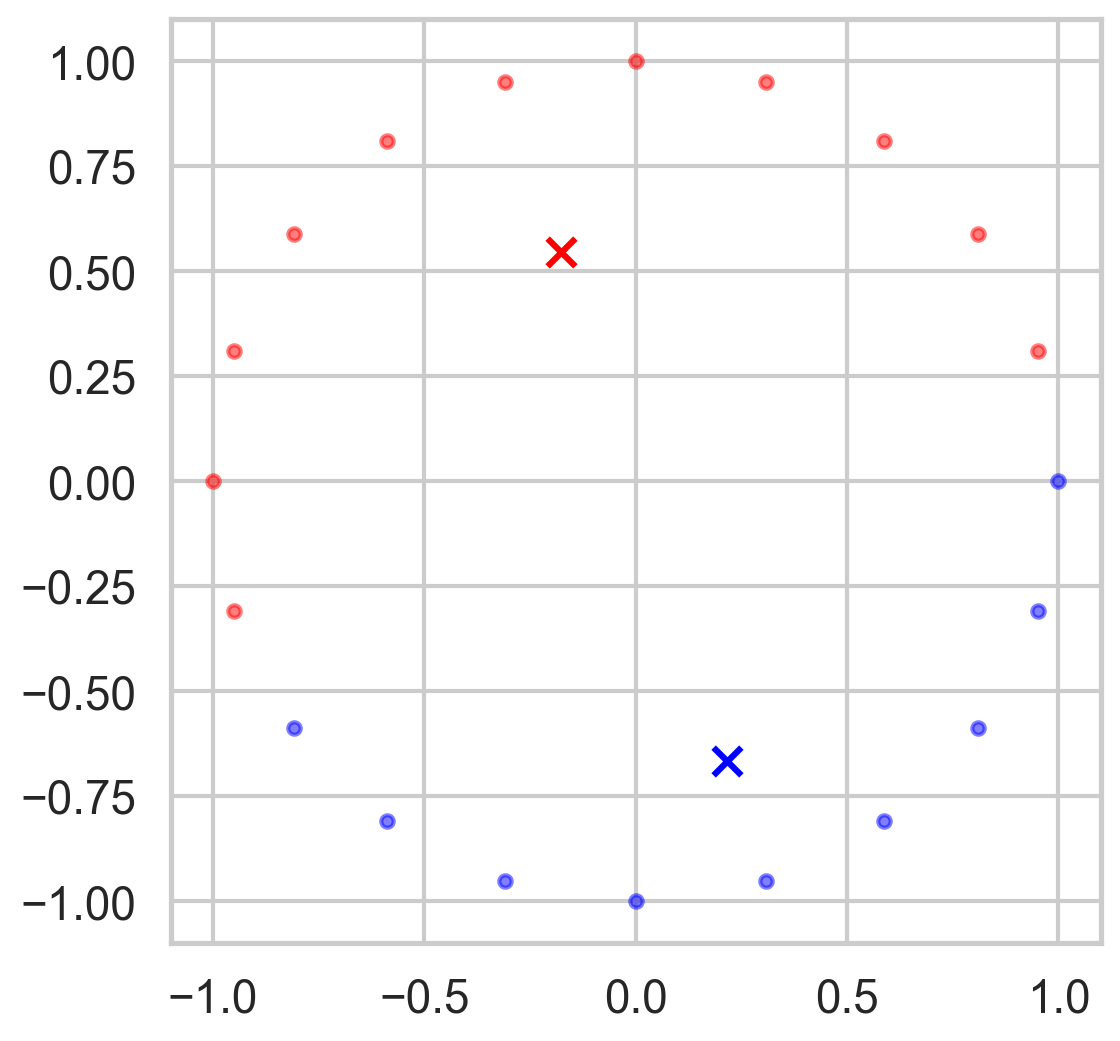

In [21]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # we are initializing once
km.fit(X)
display_cluster(X,km,num_clusters)


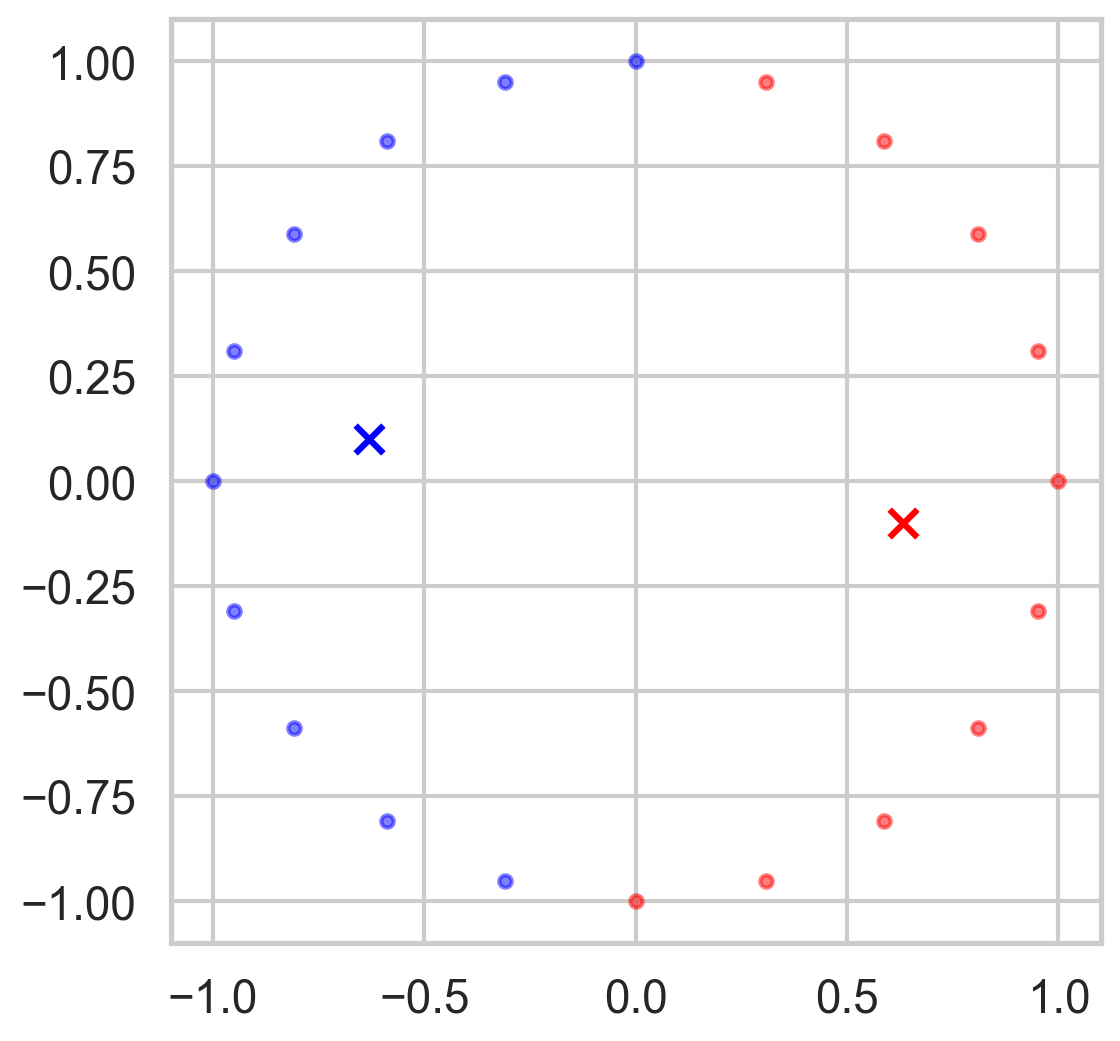

In [22]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1) # we are initializing once
km.fit(X)
display_cluster(X,km,num_clusters)

reason why they are different is because of the impact of the starting poin of the cluter centers 

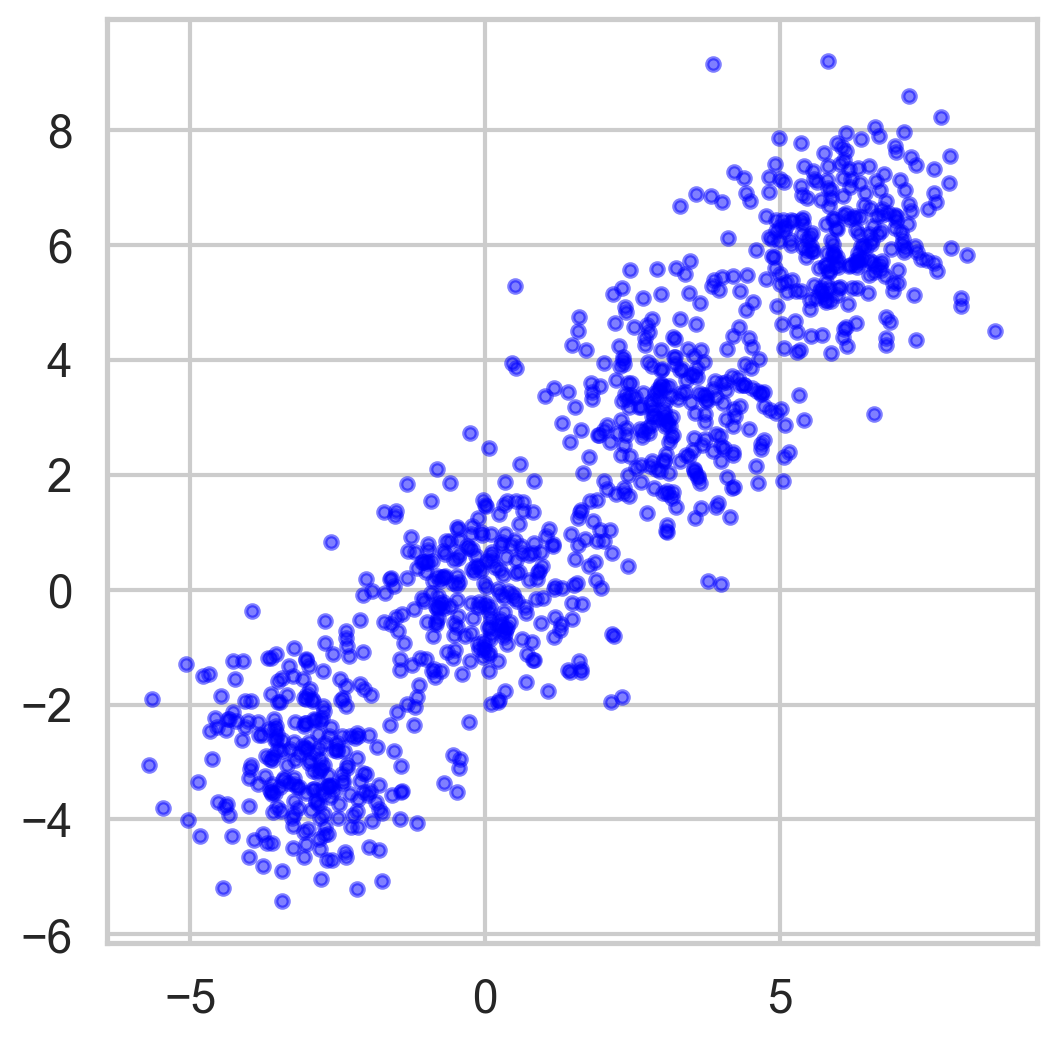

In [26]:
n_samples =1000
n_bins = 4
centers = [(0,0), (-3,-3), (3,3), (6,6)]
X, y = make_blobs(n_samples= n_samples, centers=centers, n_features=2, cluster_std= 1.0, shuffle= False, random_state= 42)
display_cluster(X)

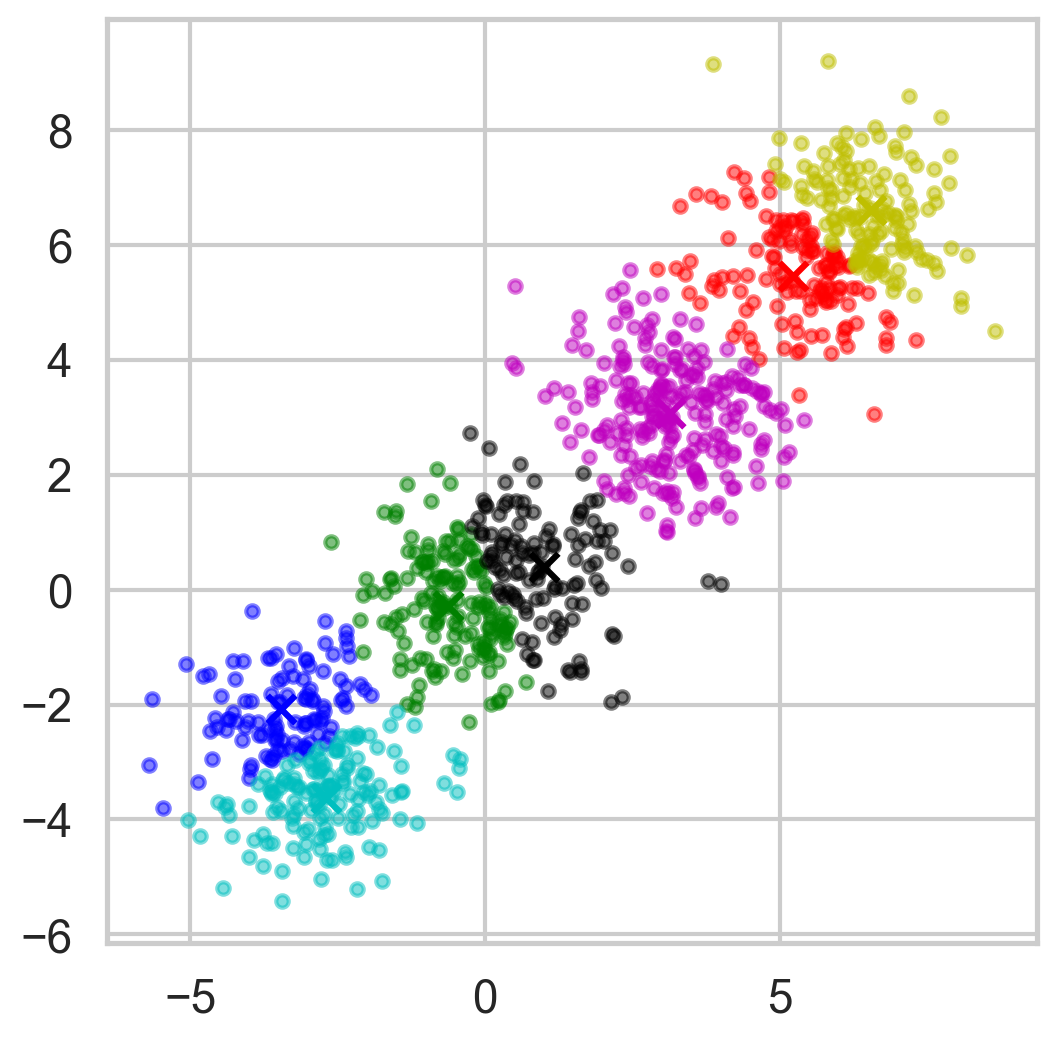

In [ ]:
num_clusters = 7 
km = KMeans(n_clusters= num_clusters)
km.fit(X)
display_cluster(X, km, num_clusters)

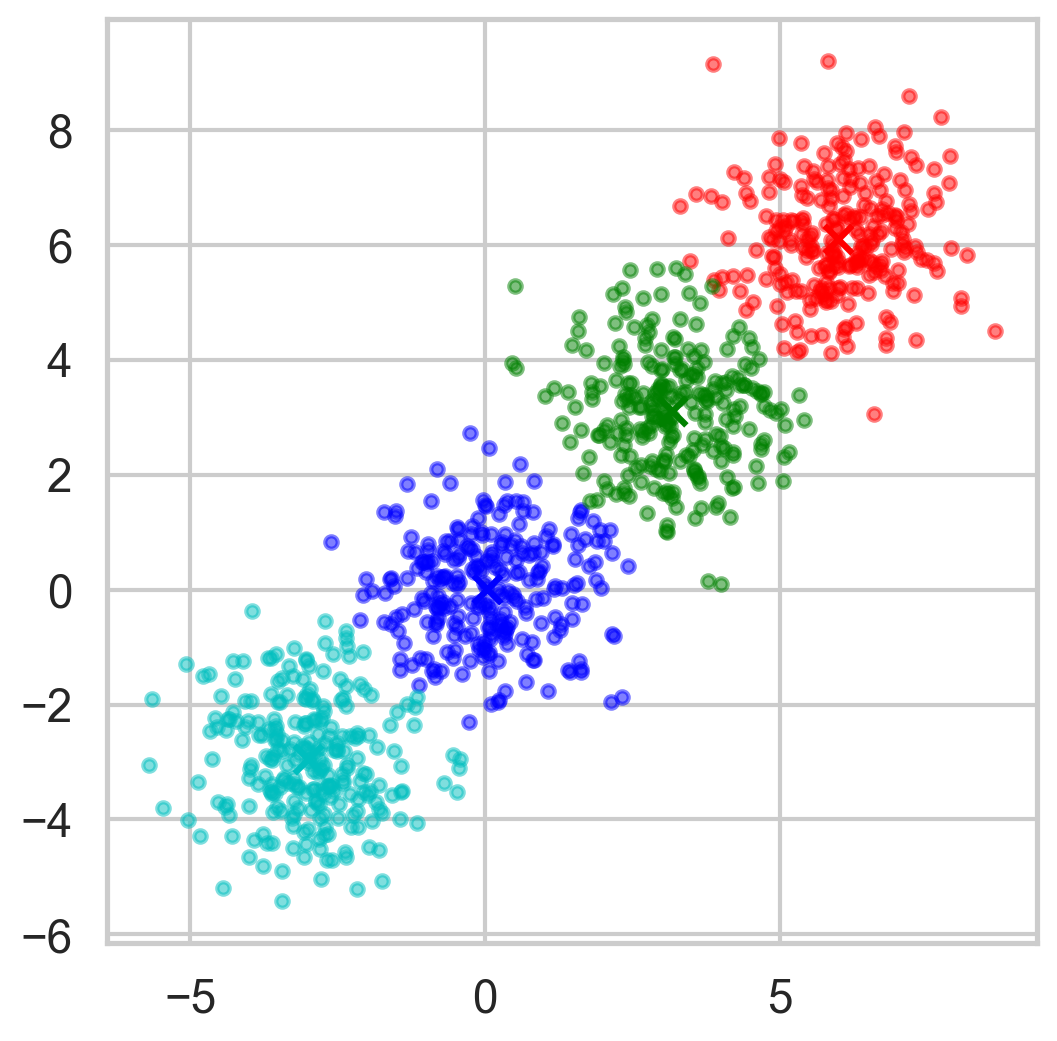

In [28]:
num_clusters = 4
km = KMeans(n_clusters= num_clusters)
km.fit(X)
display_cluster(X, km, num_clusters)

In [29]:
km.inertia_

1880.2020879944766

Then determine the best point of where the best inertia is 

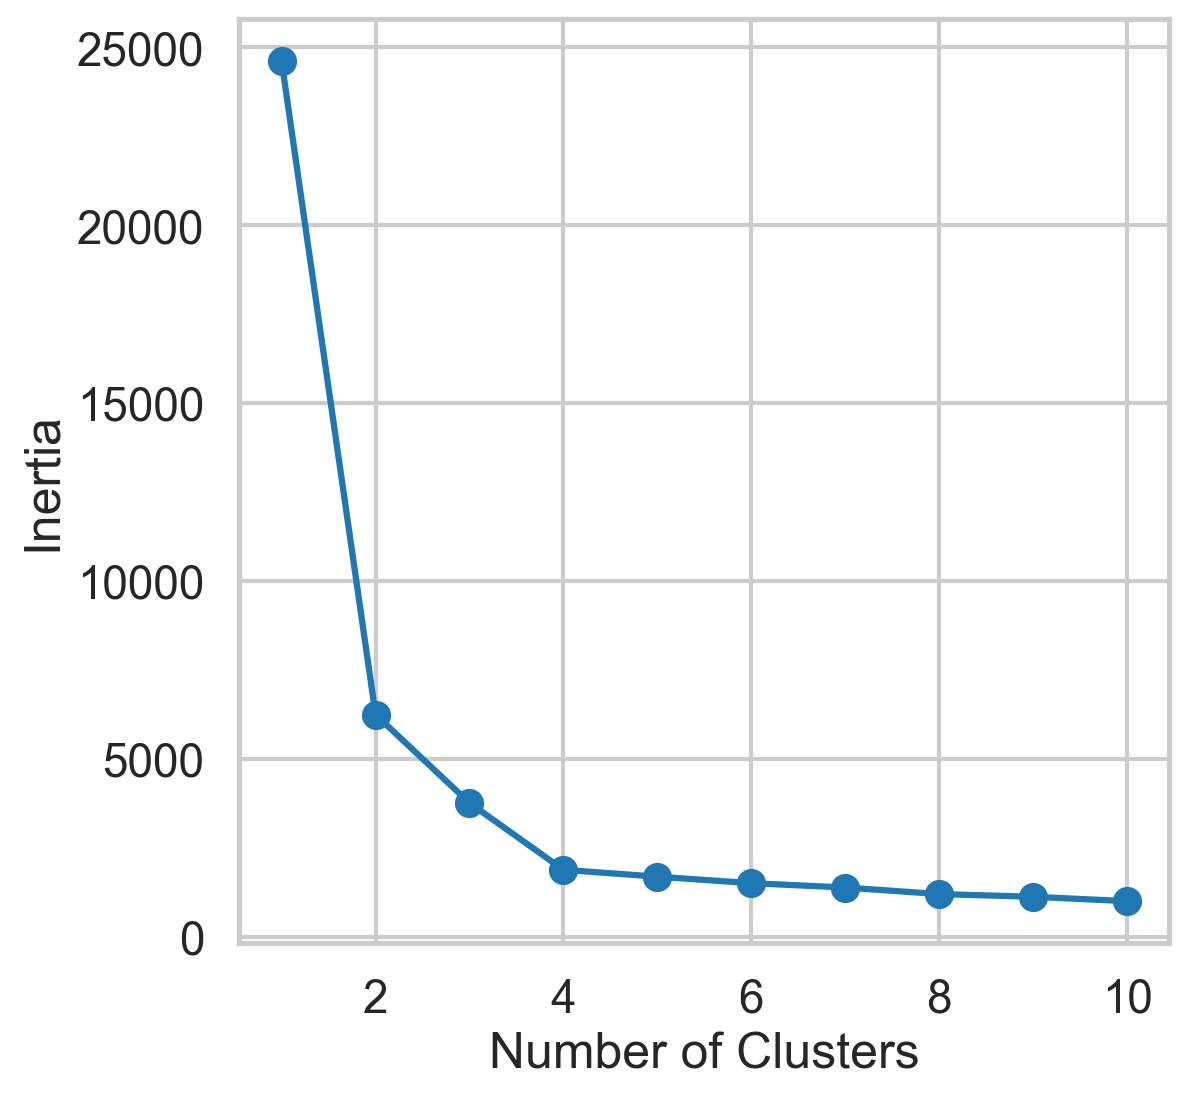

In [31]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');


##### According to the graph above the best k( cluster ) is 4

In [34]:
my_image = 'tomato.jpg'

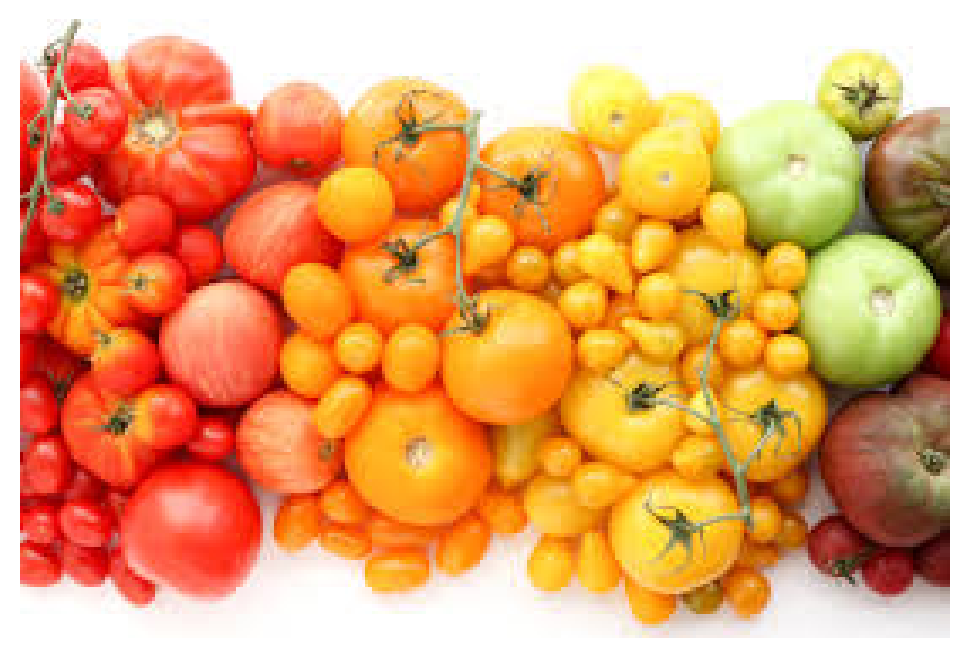

In [35]:
#Ill use pillow to diplay the image 
from PIL import Image
image = Image.open(my_image)
img_array = np.array(image)

# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [43]:
img_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [236, 234, 235],
        [236, 234, 235],
        [236, 234, 235]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 240],
        [238, 238, 240],
        [238, 238, 240]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 240, 242],
        [240, 240, 242],
        [240, 240, 242]]

(-0.5, 0.5, 0.5, -0.5)

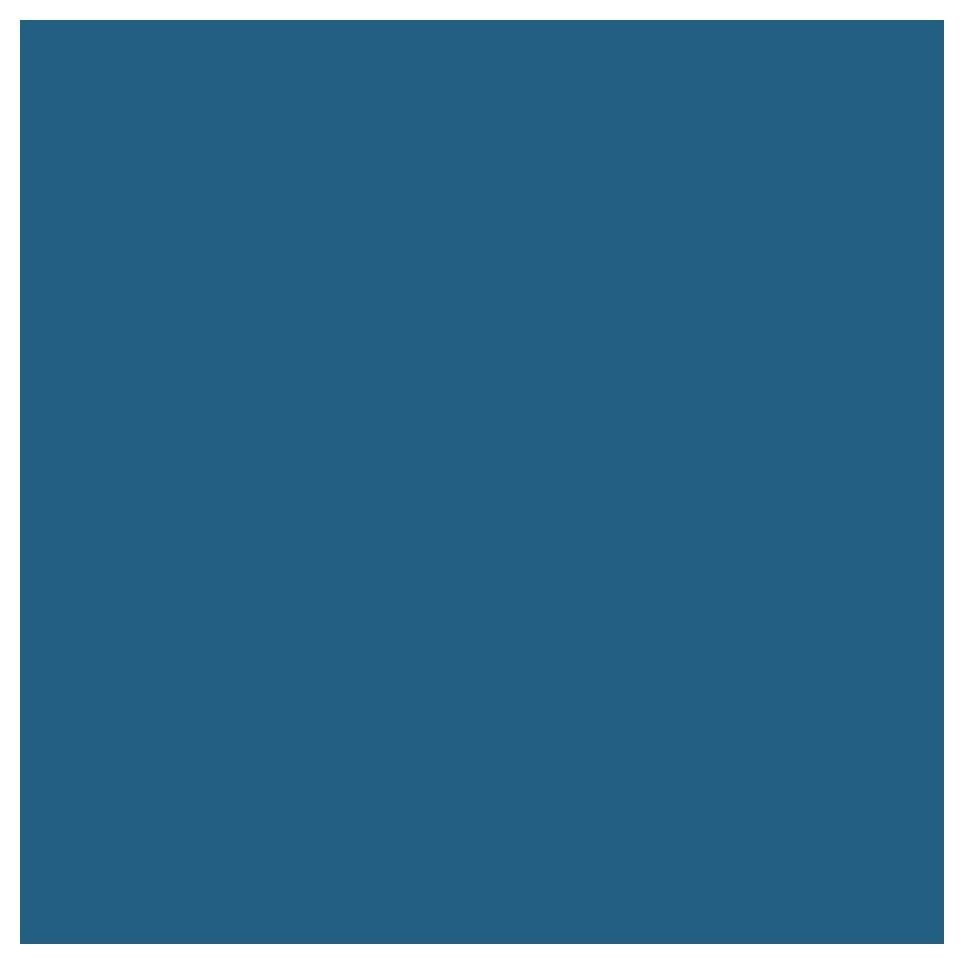

In [44]:
# assign values for the RGB.  Each value should be between 0 and 255
R = 35
G = 95
B = 131
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off')

In [45]:
img_array.shape

(183, 275, 3)

In [46]:
img = img_array

instead of making it 3 dimensions well reshape into 2 to allow clustering 

In [48]:
img_flat = img.reshape(-1, 3)
img_flat[:5,:]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [49]:
img_flat.shape

(50325, 3)

In [50]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

In [51]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

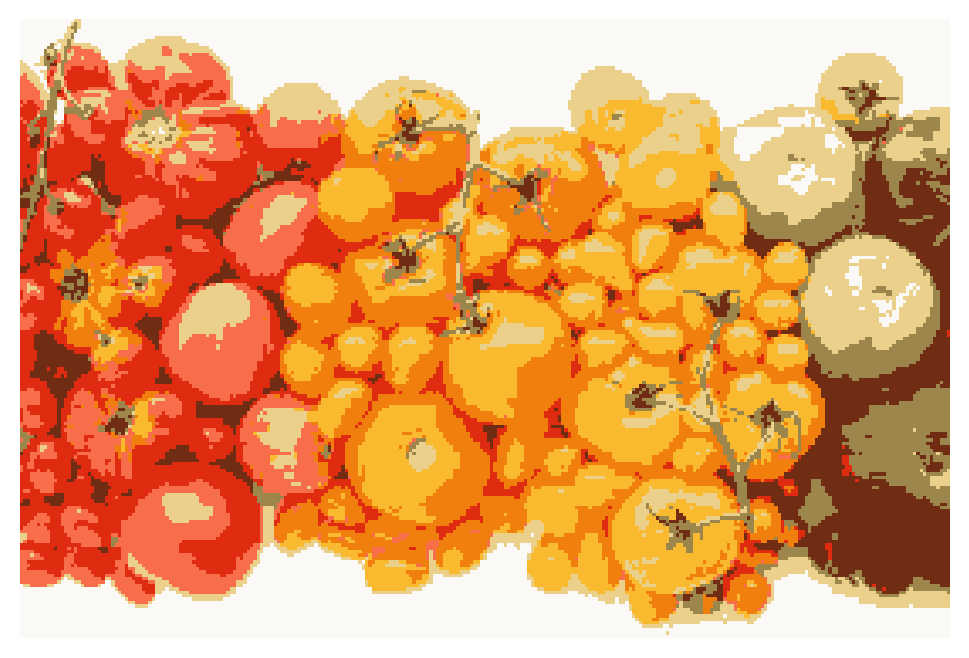

In [52]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

In [54]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

In [55]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)  

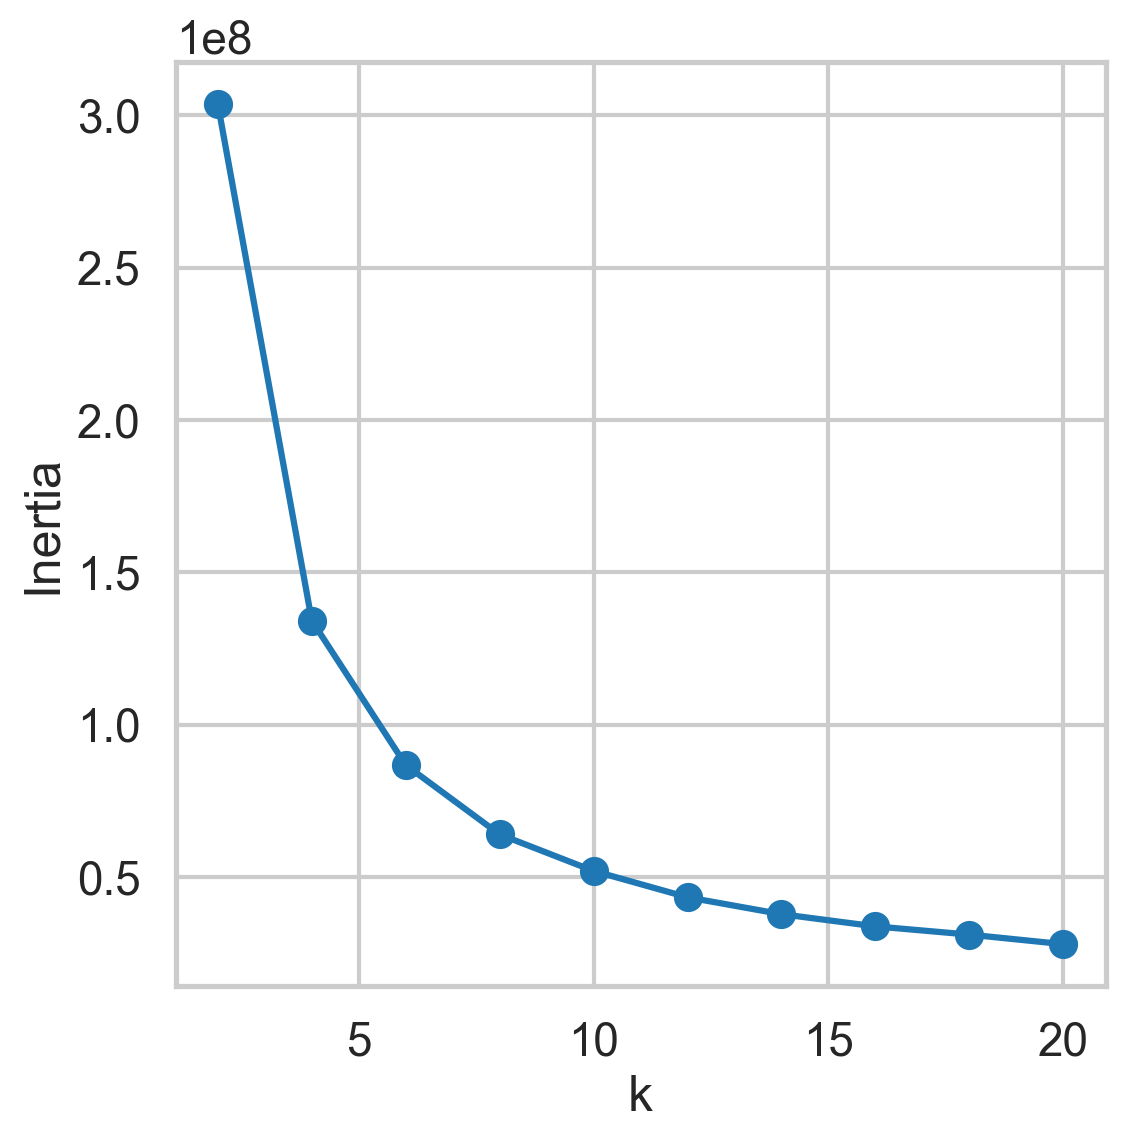

In [56]:
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

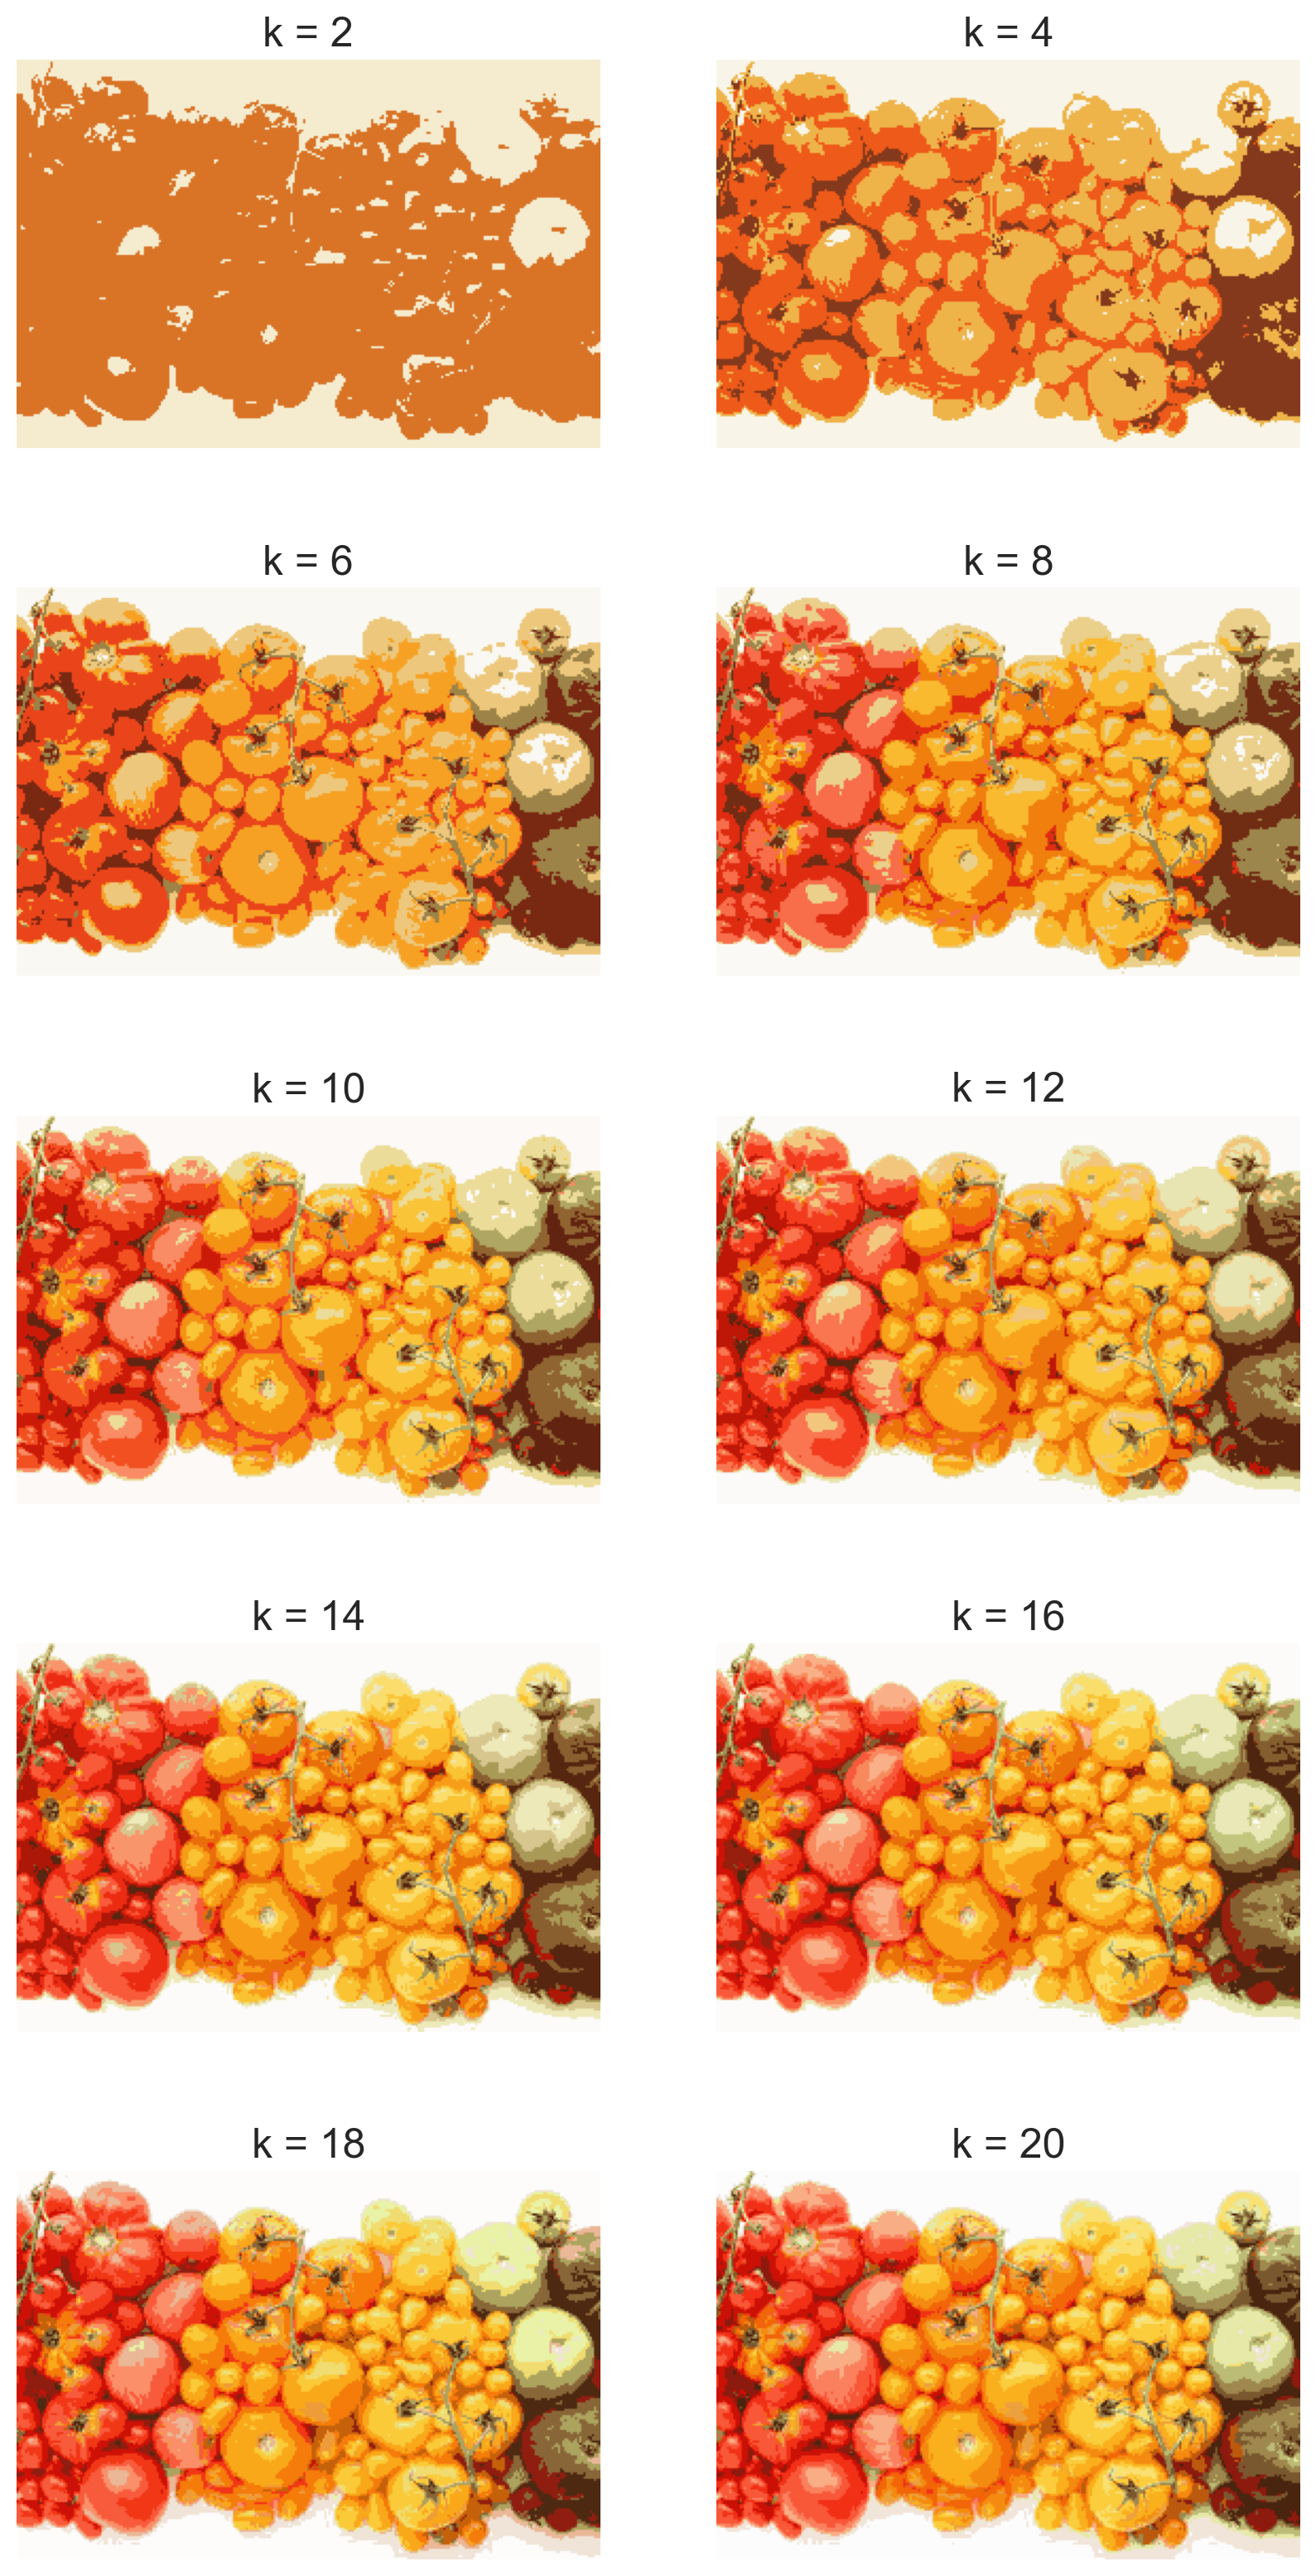

In [58]:
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');

In [59]:
len(np.unique(img_flat, axis=0))

36572

### We see that there where originally 95179 unique colors used to make up this image 